# The Spark Foundation

# Task 3: Prediction using Decision Tree Algorithm

## Name:A.Amirthavarsinipriya

## Create the Decision Tree classiﬁer and visualize it graphically. 

In [2]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset
Iris=pd.read_csv('C:/users/Amirtha/Desktop/GRIP TASK/The Spark Foundation-Task 3/Iris.csv')
#Displaying the whole dataset
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Display the First 5rows
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#View the dimensions of data
Iris.shape

(150, 6)

In [7]:
# View dataframe summary
print(Iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [8]:
# View descriptive statistics
print(Iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [13]:
#checking for NA values
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

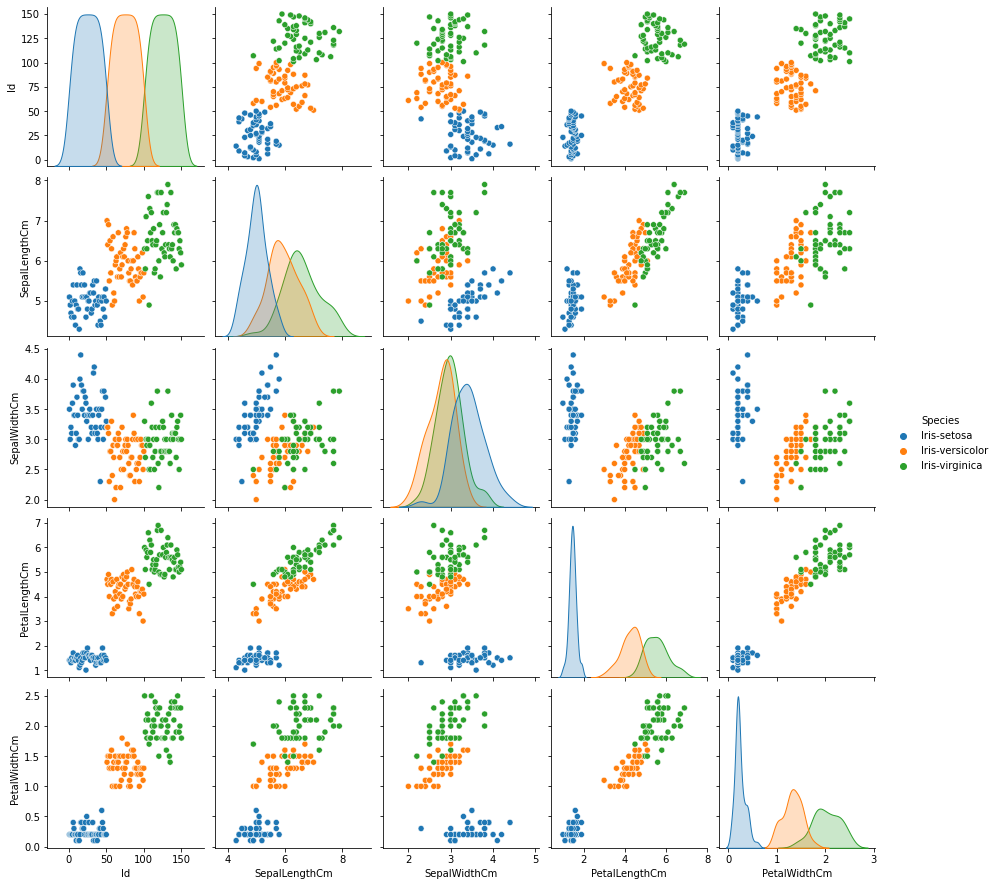

In [14]:
#Exploratory Data Analysis
sns.pairplot(Iris, hue='Species')

<AxesSubplot:>

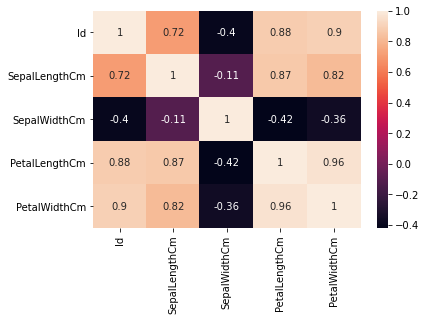

In [15]:
corr = Iris.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

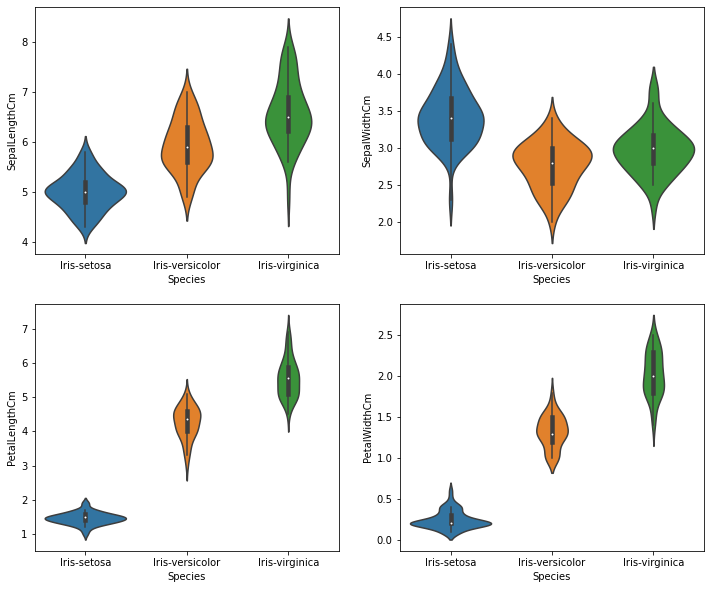

In [5]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="SepalLengthCm",data=Iris)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="SepalWidthCm",data=Iris)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="PetalLengthCm",data=Iris)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="PetalWidthCm",data=Iris)

In [6]:
Iris=Iris.drop(["Id"],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

**Before implementing any model we need to split the dataset to train and test sets. We use train_test_split class from sklearn.model_selection library to split our dataset.**

In [9]:
train,test=train_test_split(Iris,test_size=0.3)
train.shape, test.shape

((105, 5), (45, 5))

**Now let’s split the train and test sets further as input and output sets.**

In [10]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

In [11]:
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

# Decision Tree Model

**A decision tree is a flowchart-like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.. It uses Entropy and Information Gain to construct a decision tree.**

# Entropy

**Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries**

# Information Gain

**Information gain (IG) measures how much "information" a feature gives us about the class.**

In [40]:
from sklearn import metrics
DT=DecisionTreeClassifier(criterion="entropy")

In [41]:
DT.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy')

In [24]:
DTpredict=DT.predict(test_X)

In [25]:
DTaccuracy=metrics.accuracy_score(DTpredict,test_y)
print("Decission Tree Model Accuracy is {}".format(DTaccuracy*100))

Decission Tree Model Accuracy is 91.11111111111111


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,DTpredict)

array([[14,  0,  0],
       [ 0, 14,  3],
       [ 0,  1, 13]], dtype=int64)

In [29]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(train_X,train_y)

DecisionTreeClassifier()

In [30]:
modelpredict=model.predict(test_X)

In [31]:
modelaccuracy=metrics.accuracy_score(modelpredict,test_y)
print("Decission Tree Model Accuracy is {}".format(modelaccuracy*100))

Decission Tree Model Accuracy is 88.88888888888889


In [33]:
test_preddf=test.copy()
test_preddf['Predicted Species']=DTpredict
wrongpred=test_preddf.loc[test['Species'] != DTpredict]
wrongpred

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted Species
57,4.9,2.4,3.3,1.0,Iris-versicolor,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor,Iris-virginica


**From the above we can visualize the misclassified species from 57 indexed versicolor as classified Virginica**

Text(0.5, 1.0, 'Decision Tree')

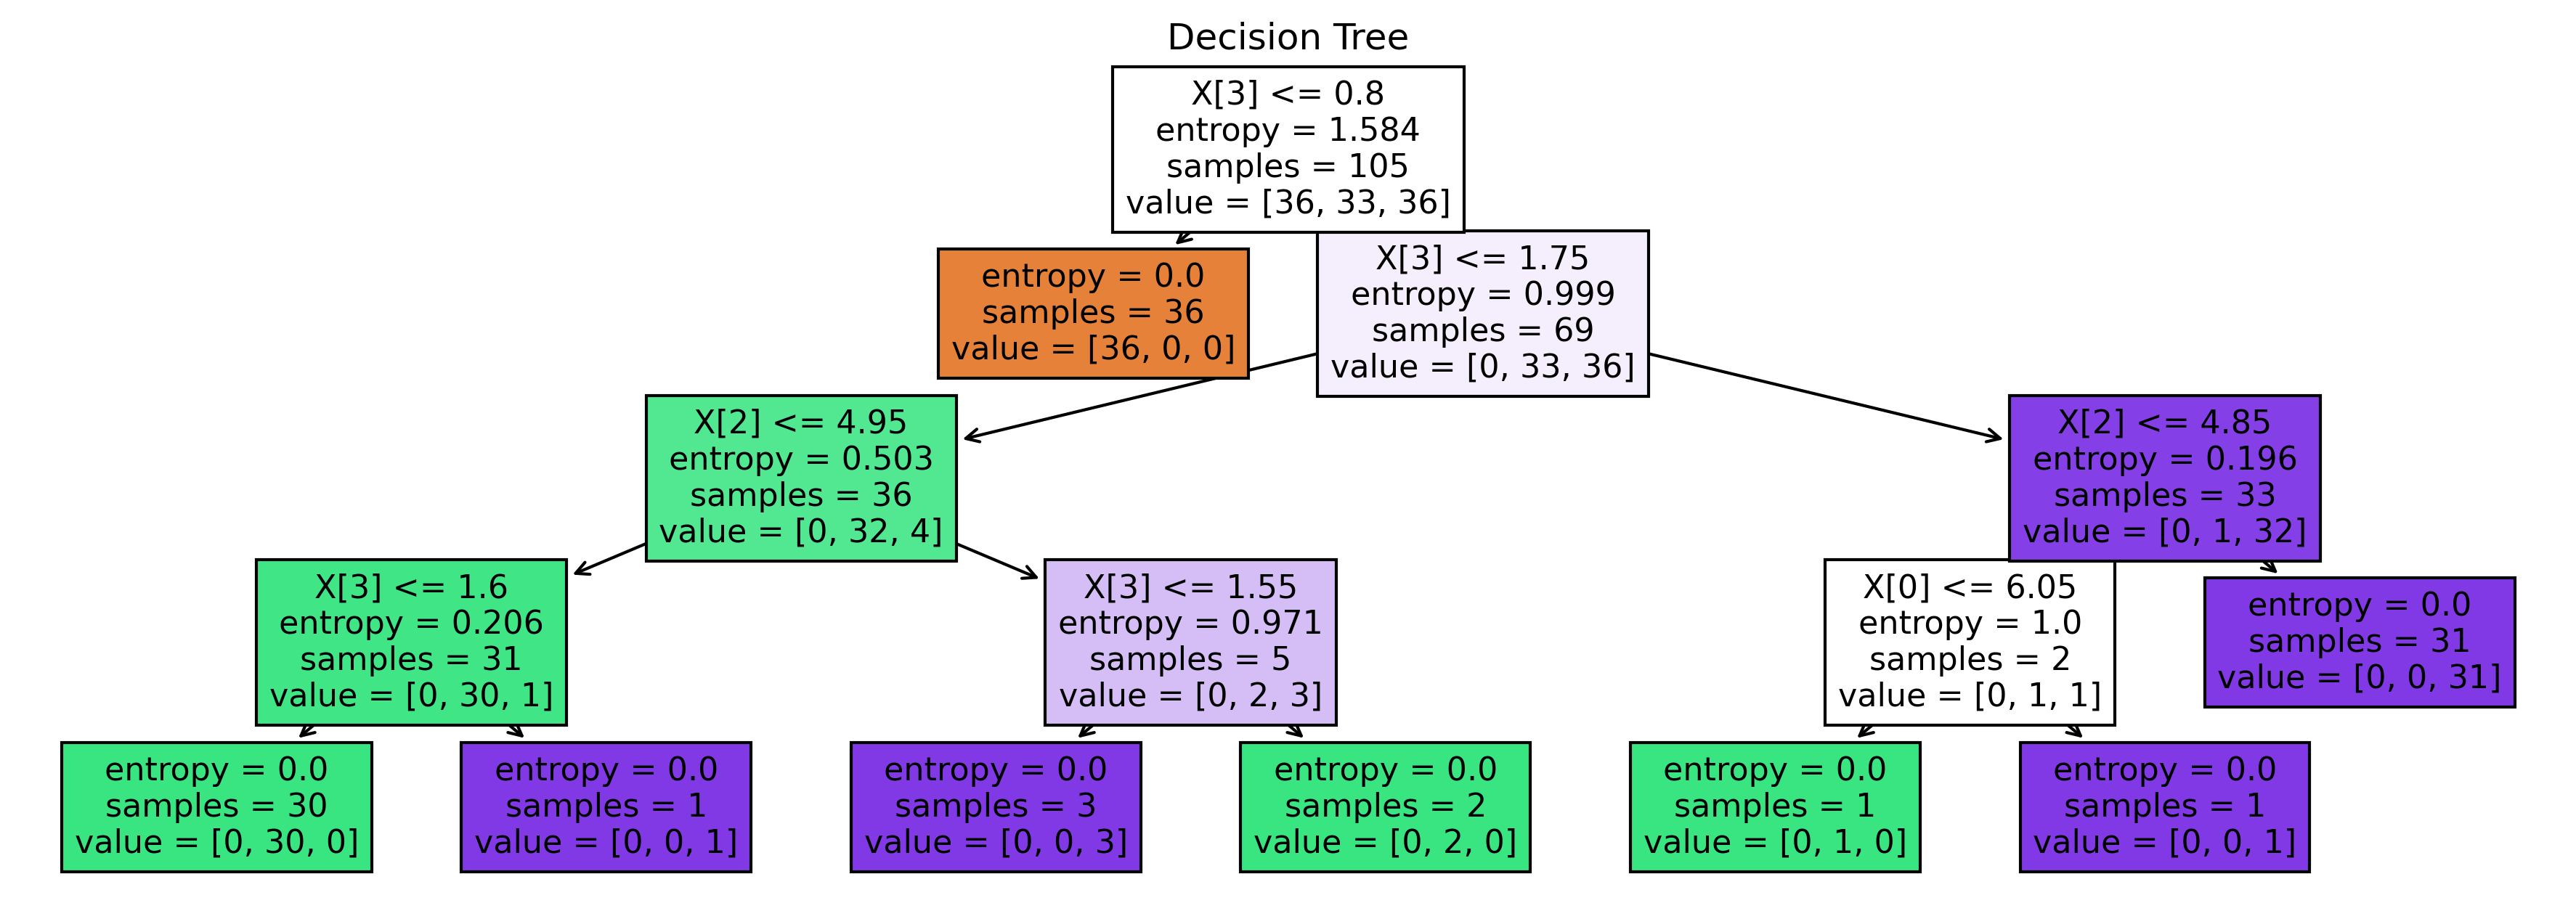

In [46]:
from sklearn import tree
plt.figure(num=None,figsize=(15,5),dpi=300)
tree.plot_tree(DT,filled=True)
plt.title('Decision Tree')

# THANK YOU